In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
pd.read()
from google.colab import files

uploaded = files.upload()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_true=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/True.csv")
df_true['label'] = "True"
df_true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


In [ ]:
df_fake=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake.csv")
df_fake['label'] = "Fake"
df_fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [ ]:
df = pd.concat([df_true, df_fake], axis=0)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle
print(df)

                                                   title  \
0       Terrifying: Watch Donald Trump Turn These Ado...   
1       9th Circuit BURNS Trump BAD By Sticking 5th G...   
2      Venice Commission: Polish judiciary reforms po...   
3      China marks Nanjing Massacre anniversary but X...   
4      Pope says humanity will 'go down' if it does n...   
...                                                  ...   
44893  “DEAD BROKE” HILLARY HITS A SWANKY SALON WITH ...   
44894   Hispanic Rep Just Told Trump Where He Can Sho...   
44895  Zimbabwe minister Moyo's Twitter account hacke...   
44896   Trump’s Pick For Supreme Court Justice Shows ...   
44897  NSA chief on Russia-U.S. cyber unit: Now is 'n...   

                                                    text       subject  \
0      Being a xenophobic bigot and a confirmed fasci...          News   
1      Probably the biggest point of contention with ...          News   
2      WARSAW (Reuters) - The Venice Commission, a pa... 

In [ ]:

# Drop any missing values (if present)
df.dropna(inplace=True)

# Keep only text and label
df = df[['text', 'label']]

df

,text,label
0,Being a xenophobic bigot and a confirmed fasci...,Fake
1,Probably the biggest point of contention with ...,Fake
2,"WARSAW (Reuters) - The Venice Commission, a pa...",True
3,BEIJING (Reuters) - China marked the 80th anni...,True
4,ABOARD THE PAPAL PLANE (Reuters) - Pope Franci...,True
...,...,...
44893,Wait! I thought she was dead broke and just ...,Fake
44894,Now that Republican presidential nominee Donal...,Fake
44895,JOHANNESBURG (Reuters) - A relative of Zimbabw...,True
44896,The GOP has been absolutely obsessed with bloc...,Fake


In [ ]:
from sklearn.model_selection import train_test_split

X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test

,text
22216,WASHINGTON (Reuters) - President Donald Trump ...
27917,Trump administration officials are mulling an ...
25007,ADDIS ABABA (Reuters) - Ethnic clashes killed ...
1377,We can all agree on solutions to end terrorism...
32476,Donald Trump and the RNC have had a roller coa...
...,...
42119,MILWAUKEE (Reuters) - Democratic presidential ...
4068,Apparently being the wife of a former Democrat...
22498,Two of the most despicable RINO s (Republicans...
14658,ADEN (Reuters) - A suicide car bomber blew him...


In [ ]:
# Convert text into numerical vectors
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)


# Target labels
y = df['label']





In [ ]:
X_train

In [ ]:
X_test

,text
22216,WASHINGTON (Reuters) - President Donald Trump ...
27917,Trump administration officials are mulling an ...
25007,ADDIS ABABA (Reuters) - Ethnic clashes killed ...
1377,We can all agree on solutions to end terrorism...
32476,Donald Trump and the RNC have had a roller coa...
...,...
42119,MILWAUKEE (Reuters) - Democratic presidential ...
4068,Apparently being the wife of a former Democrat...
22498,Two of the most despicable RINO s (Republicans...
14658,ADEN (Reuters) - A suicide car bomber blew him...


In [ ]:
# Step 1: Fit only on training
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)

In [ ]:
# Step 2: Transform test using same vectorizer
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Step 3: Train the model
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train_tfidf, y_train)


PassiveAggressiveClassifier()

In [ ]:
sample = ["The president announced a new bill to reduce taxes and improve trade."]
sample_vec = vectorizer.transform(sample)
prediction = model.predict(sample_vec)

print("Prediction:", "Real" if prediction[0] == 1 else "Fake")

Prediction: Fake


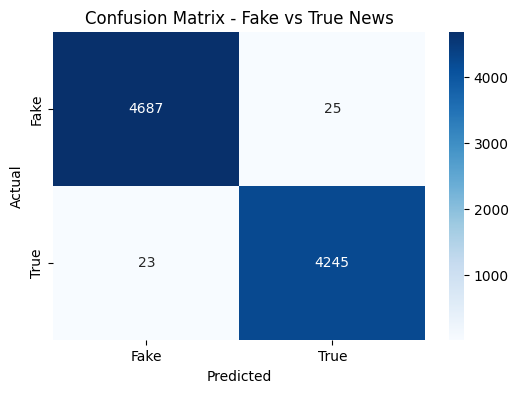

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = model.predict(X_test_tfidf)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Fake', 'True'])

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Fake vs True News')
plt.show()


In [ ]:
y_pred = model.predict(X_test_tfidf)
from sklearn.metrics import accuracy_score
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9946547884187082


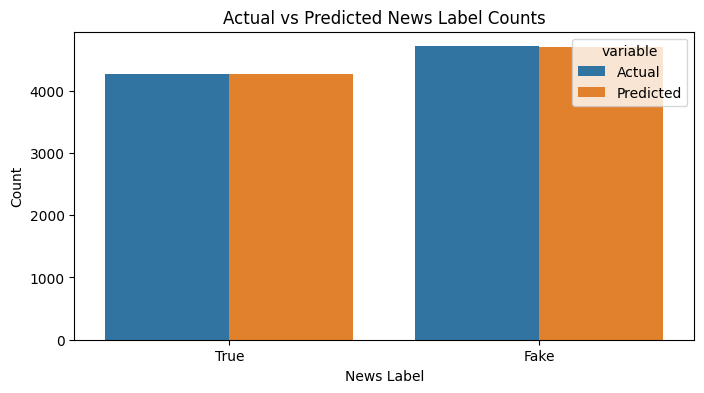

In [ ]:

# Make a DataFrame for actual and predicted labels
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs predicted count
plt.figure(figsize=(8, 4))
sns.countplot(data=results_df.melt(), x='value', hue='variable')
plt.title('Actual vs Predicted News Label Counts')
plt.xlabel('News Label')
plt.ylabel('Count')
plt.show()
